In [2]:
%%capture
import numpy as np
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import csv
import os
import missingno as msno
from collections import Counter
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import preprocessing
import plotly.express as px
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv(r'/content/drive/MyDrive/SMOS/ESS10.csv',low_memory=False)

In [5]:
df.head()

,pweight,name,essround,edition,proddate,idno,cntry,dweight,prob,stratum,...,ginwe,hinwe,iinwe,kinwe,vinwe,inwde,jinws,jinwe,inwtm,domain
0,0.217716,ESS10e01_3,10,1.3,4.10.2022,10002,BG,1.032306,0.000628,67,...,2021-07-24 13:05:44,2021-07-24 13:11:27,2021-07-24 13:11:35,2021-07-24 13:12:20,2021-07-24 13:12:21,2021-07-24 13:13:01,2021-07-24 13:12:33,2021-07-24 13:13:06,53.0,NaN
1,0.217716,ESS10e01_3,10,1.3,4.10.2022,10006,BG,0.879120,0.000737,68,...,2021-08-28 08:04:49,2021-08-28 08:07:22,2021-08-28 08:07:39,2021-08-28 08:14:39,2021-08-28 08:14:43,2021-08-28 08:36:39,2021-08-28 08:25:43,2021-08-28 08:36:49,36.0,NaN
2,0.217716,ESS10e01_3,10,1.3,4.10.2022,10009,BG,1.006098,0.000644,57,...,2021-07-15 21:26:27,2021-07-15 21:33:51,2021-07-15 21:34:36,2021-07-15 21:42:37,2021-07-15 21:42:49,2021-07-15 21:44:59,2021-07-15 21:43:42,2021-07-15 21:45:50,93.0,NaN
3,0.217716,ESS10e01_3,10,1.3,4.10.2022,10024,BG,0.955327,0.000678,30,...,2021-08-01 13:16:03,2021-08-01 13:19:41,2021-08-01 13:20:15,2021-08-01 13:24:40,2021-08-01 13:24:46,2021-08-08 17:42:17,2021-08-01 13:25:19,2021-08-08 17:42:20,57.0,NaN
4,0.217716,ESS10e01_3,10,1.3,4.10.2022,10027,BG,0.841009,0.000770,20,...,2021-07-24 18:02:21,2021-07-24 18:08:15,2021-07-24 18:09:09,2021-07-24 18:16:57,2021-07-24 18:17:07,2021-07-24 18:19:22,2021-07-24 18:18:09,2021-07-24 18:19:29,103.0,NaN


There are a lot of columns, we want to use only few of them, in particular:





* `health`

* `brncntr`

* `stfeco`

* `rlgdgr`


* `wrclmch`: How worried about climate change? 

* `ccnthum` : Climate change caused by natural processes, human activity, or both?

* `lrscale` : In politics people sometimes talk of 'left' and 'right'. Using this card, where would you place yourself on this scale, where 0 means the left and 10 means the right?

* `eisced`: Highest level of education, ES - ISCED

* `agea` : Age of respondent

* `gndr` : Gender

* `hinctnta` : Household's total net income, all sources

* `cntry` : Country



In [155]:
Selected_columns=['cntry','hinctnta', 'gndr', 'agea','eisced','lrscale','wrclmch']

In [156]:
d=df[Selected_columns]

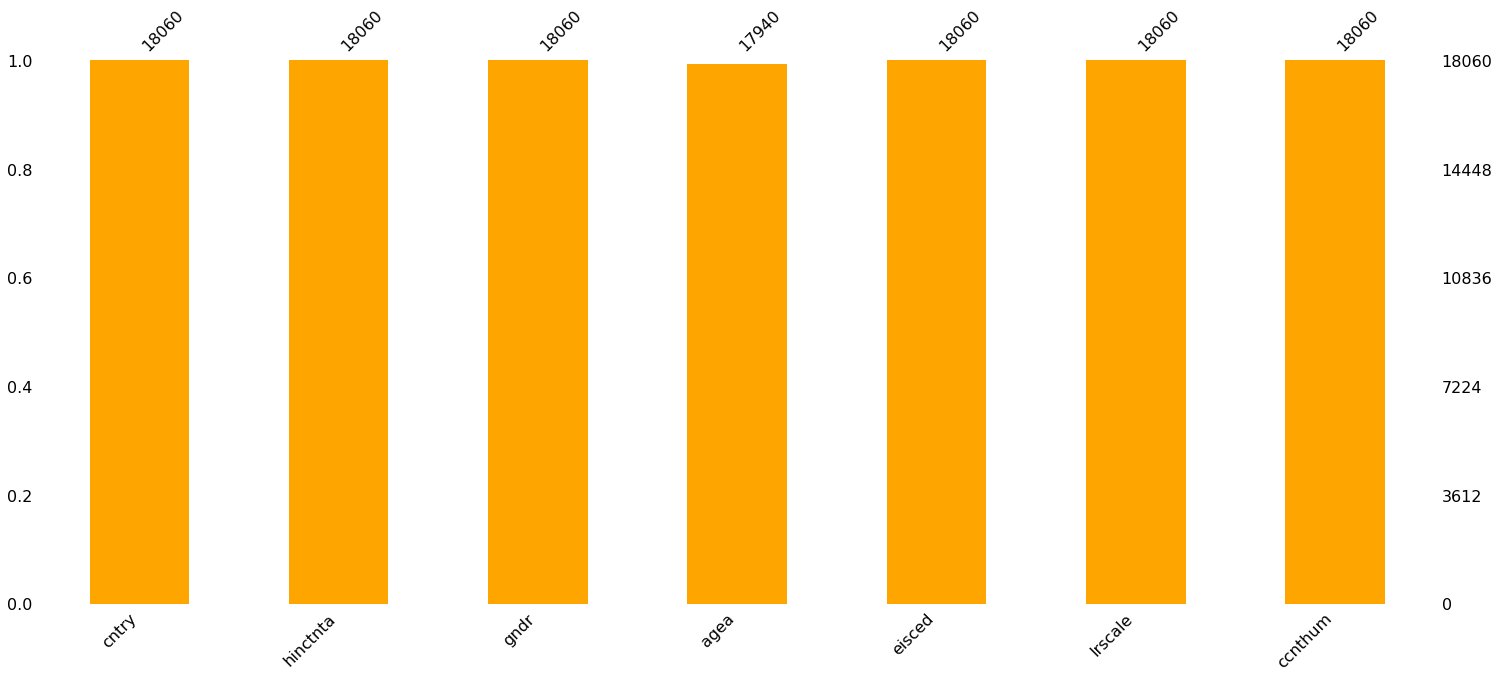

In [7]:
msno.bar(d, color='orange')

In [138]:
d.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
d.head()

,cntry,hinctnta,gndr,agea,eisced,lrscale,ccnthum
0,BG,7,2,76.0,4,88,5
1,BG,77,1,43.0,6,10,5
2,BG,7,2,50.0,7,4,3
3,BG,6,2,51.0,4,88,4
4,BG,4,1,70.0,7,4,3


In [57]:
d.cntry.value_counts()

BG    1938
FR    1590
CZ    1542
FI    1448
EE    1375
HU    1176
LT    1018
HR    1004
SI     967
SK     824
Name: cntry, dtype: int64

In [18]:
d.hinctnta.value_counts()

77    2416
5     1648
4     1607
8     1562
2     1524
7     1523
6     1510
3     1458
10    1301
1     1265
9     1251
88     870
99       5
Name: hinctnta, dtype: int64

In [15]:
d.gndr.value_counts()

2    9898
1    8042
Name: gndr, dtype: int64

In [14]:
d.agea.value_counts()

61.0    380
41.0    377
51.0    362
66.0    352
56.0    342
       ... 
86.0     67
15.0     59
89.0     43
87.0     39
88.0     38
Name: agea, Length: 76, dtype: int64

In [16]:
d.eisced.value_counts()

4     5911
3     2749
7     2525
2     2151
6     2001
5     1958
1      569
77      25
55      21
99      18
88      12
Name: eisced, dtype: int64

In [12]:
d.lrscale.value_counts()

5     5425
7     1690
6     1517
88    1502
8     1494
3     1110
4     1056
10    1022
2      732
0      712
77     614
9      538
1      369
99     159
Name: lrscale, dtype: int64

In [157]:
d.wrclmch.value_counts()

3    7785
4    4930
2    2680
5    1488
1     840
6     201
8     121
7      13
9       2
Name: wrclmch, dtype: int64

In [159]:
cleanup = {"hinctnta":     {77: np.nan ,88: np.nan, 99: np.nan},
           "lrscale":      {77: np.nan ,88: np.nan, 99: np.nan},
           #"ccnthum":      {1.0:1, 2.0:1, 3.0:1, 4.0:2, 5.0:2,77: np.nan ,88: np.nan, 99: np.nan, 55:np.nan},
           "eisced":       {77: np.nan ,88: np.nan, 99: np.nan, 55:np.nan},
           "gndr":       {2: 0},
           "cntry": {'BG':1, 'FR': 2, 'CZ':3, 'FI': 4, 'EE':5, 'HU': 6, 'LT':7, 'HR': 8, 'SI':9, 'SK': 10 },
           "wrclmch": {6: np.nan ,7: np.nan, 8: np.nan, 9:np.nan,1:0, 2:0, 3:0, 4:1, 5:1}
           }

In [160]:
d = d.replace(cleanup)

In [185]:
d['wrclmch'] = d['wrclmch'].astype(int)

In [186]:
d.wrclmch.value_counts()

0    8229
1    4748
Name: wrclmch, dtype: int64

In [162]:
d.dropna(inplace=True)

In [163]:
d

,cntry,hinctnta,gndr,agea,eisced,lrscale,wrclmch
2,1,7.0,0,50.0,7.0,4.0,0.0
4,1,4.0,1,70.0,7.0,4.0,1.0
7,1,4.0,1,48.0,4.0,1.0,0.0
8,1,3.0,1,71.0,4.0,6.0,1.0
9,1,3.0,1,71.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...
18052,10,2.0,1,73.0,3.0,9.0,0.0
18053,10,7.0,0,40.0,4.0,3.0,0.0
18055,10,4.0,1,67.0,3.0,9.0,0.0
18057,10,8.0,1,48.0,7.0,5.0,0.0


In [187]:
train = d.sample(frac=0.8, random_state=25)
test = d.drop(train.index)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 10382
No. of testing examples: 2595


In [188]:
x_train = train[train.columns[0:len(train.columns)-1]]
y_train = train[train.columns[-1]]

x_test = test[test.columns[0:len(test.columns)-1]]
y_test = test[test.columns[-1]]

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


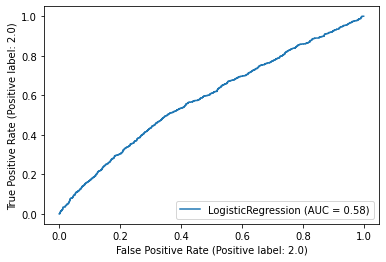

In [150]:
plot_roc_curve(logreg, x_test, y_test)

In [190]:
logreg.score(x_test, y_test)

0.6200385356454721

In [169]:
logreg.score(x_train, y_train)

0.6374494317087266

In [154]:
logreg.predict(x_test)

array([1., 1., 2., ..., 1., 1., 1.])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


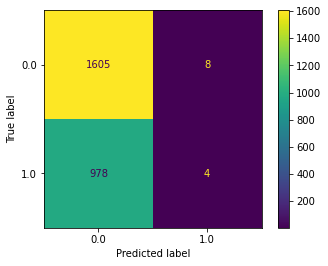

In [167]:
plot_confusion_matrix(logreg, x_test, y_test)

In [170]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [172]:
gnb.score(x_train, y_train)

0.6361009439414371

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


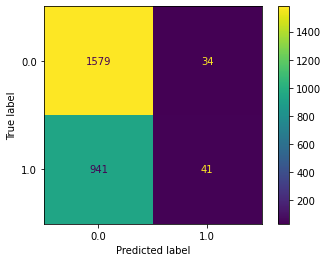

In [171]:
plot_confusion_matrix(gnb, x_test, y_test)

In [194]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [176]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [178]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(),metrics = ['accuracy'])

In [ ]:
model_1.fit(x_train, y_train, epochs = 50)

In [195]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [196]:
model = Sequential()

In [197]:
model.add(Dense(hidden_units, input_dim=8, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [199]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])